In [1]:
import pandas as pd

df =  pd.read_csv('EDA.csv')
df.head()

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,Z_Revenue,Response,Age,Total_Children,Total_Expenses,Total_Transactions,Total_Campaign,Age_Group,Income_Group,Spending_Group
0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,...,11,1,68,0,1617000,25,0,>55,Medium,High
1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,...,11,0,71,2,27000,6,0,>55,Low,Very Low
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,...,11,0,60,0,776000,21,0,>55,High,Medium
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,...,11,0,41,1,53000,8,0,36-55,Very Low,Very Low
4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,...,11,0,44,1,422000,19,0,36-55,Medium,Medium


In [2]:
# Check data null
null_counts = df.isnull().sum()

# Deleted null
df_cleaned = df.dropna()

# Deleted duplicate data
df_cleaned = df_cleaned.drop_duplicates()

# Deleted coulumn
df.drop(columns=["Unnamed: 0", "Z_CostContact", "Z_Revenue"], inplace=True)


In [3]:
# Identification categorical coulumn
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns

# One-hot encoding
df_encoded = pd.get_dummies(df_cleaned, columns=categorical_cols, drop_first=True)

In [4]:
# Income Group: Very Low, Low, Medium, High
df["Income_Group"] = pd.qcut(df["Income"], q=4, labels=["Very Low", "Low", "Medium", "High"])

# Total_Expenses: Very Low, Low, Medium, High
df["Spending_Group"] = pd.qcut(df["Total_Expenses"], q=4, labels=["Very Low", "Low", "Medium", "High"])

In [5]:
categorical_features = ['Income_Group', 'Spending_Group']

from sklearn.preprocessing import OneHotEncoder

# Choose Categorical
cat_df = df[categorical_features].dropna()

# One-hot encode
encoder = OneHotEncoder(sparse_output=False)
X_encoded = encoder.fit_transform(cat_df)

# Show encoding coulumn
encoded_columns = encoder.get_feature_names_out(categorical_features)
print(encoded_columns)

['Income_Group_High' 'Income_Group_Low' 'Income_Group_Medium'
 'Income_Group_Very Low' 'Spending_Group_High' 'Spending_Group_Low'
 'Spending_Group_Medium' 'Spending_Group_Very Low']


In [6]:
# Encoding to DataFrame
encoded_df = pd.DataFrame(X_encoded, columns=encoded_columns, index=cat_df.index)

# Merge to data
df_encoded = pd.concat([df, encoded_df], axis=1)

In [7]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False) 
X_encoded = encoder.fit_transform(df[categorical_features])

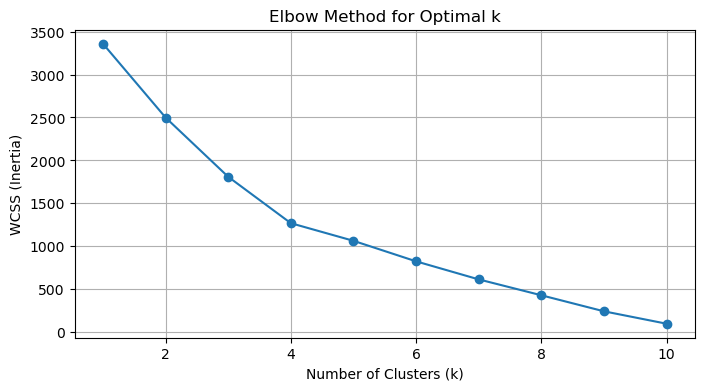

In [8]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

wcss = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_encoded)
    wcss.append(kmeans.inertia_)  # total within-cluster sum of squares

# Plot Elbow
plt.figure(figsize=(8, 4))
plt.plot(K_range, wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()


In [9]:
from sklearn.metrics import silhouette_score

# Using k = 4
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X_encoded)

# Evaluate Silhouette Score
score = silhouette_score(X_encoded, labels)
print("Silhouette Score (k=4):", score)

# Put Cluster into Dataframe
df['Cluster_Cat'] = labels

Silhouette Score (k=4): 0.5432028436372806


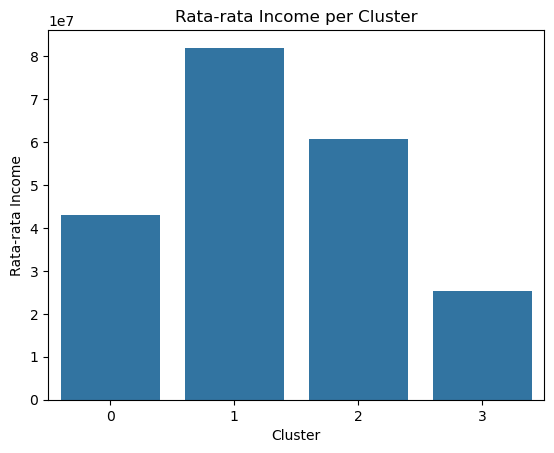

In [12]:
avg_income = df.groupby('Cluster_Cat')['Income'].mean().reset_index()

sns.barplot(x='Cluster_Cat', y='Income', data=avg_income)
plt.title('Rata-rata Income per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Rata-rata Income')
plt.show()

Text(0.5, 1.0, 'Total Visit Web per Cluster')

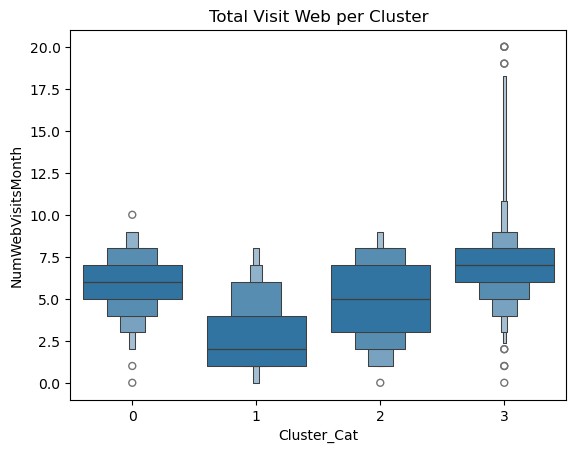

In [21]:
sns.boxenplot(x=df['Cluster_Cat'], y=df['NumWebVisitsMonth'])
plt.title('Total Visit Web per Cluster')

In [13]:
profil_cluster = df.groupby('Cluster_Cat').agg({
    'Age': ['mean', 'min', 'max'],
    'Income': 'mean',
    'Education': lambda x: x.value_counts().index[0],  # kategori paling umum
    'Marital_Status': lambda x: x.value_counts().index[0],
    'Kidhome': 'mean',
    'Teenhome': 'mean'
}).round(2)

profil_cluster

Age                Income Education Marital_Status Kidhome  \
              mean min  max         mean  <lambda>       <lambda>    mean   
Cluster_Cat                                                                 
0            56.90  33  125  42899533.70        S1        Menikah    0.73   
1            56.95  30  126  81952838.79        S1        Menikah    0.07   
2            59.02  30  132  60653254.42        S1        Menikah    0.24   
3            51.04  29   79  25296583.93        S1        Menikah    0.79   

            Teenhome  
                mean  
Cluster_Cat           
0               0.67  
1               0.22  
2               0.74  
3               0.25

(0.0, 120000000.0)

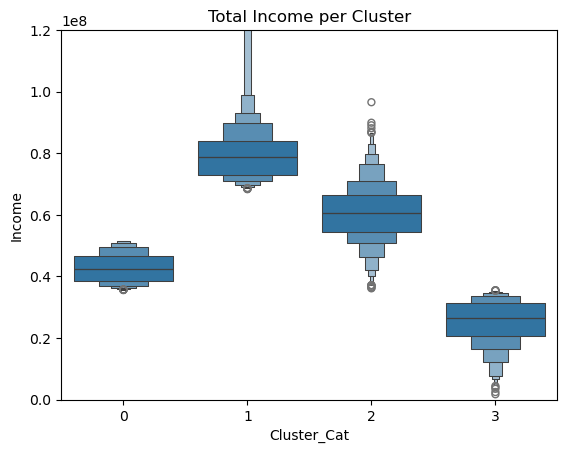

In [ ]:
sns.boxenplot(x=df['Cluster_Cat'], y=df['Income'])
plt.title('Total Income per Cluster')
plt.ylim(0, 120000000)

Text(0.5, 1.0, 'Total Transactions per Cluster')

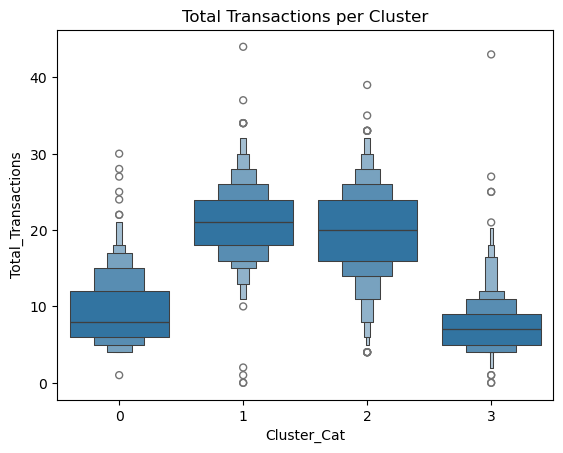

In [20]:
sns.boxenplot(x=df['Cluster_Cat'], y=df['Total_Transactions'])
plt.title('Total Transactions per Cluster')